In [20]:
import pandas as pd
import numpy as np


In [21]:
df=pd.read_csv('Debernardi et al 2020 data.csv')
dd=pd.read_csv('Debernardi et al 2020 data.csv')

In [22]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [23]:
df=df.drop('stage',axis=1)
df=df.drop('benign_sample_diagnosis',axis=1)

In [24]:
print(df['diagnosis'].unique())
print(df['sample_origin'].unique())

[1 2 3]
['BPTB' 'LIV' 'ESP' 'UCL']


In [26]:
print(df['patient_cohort'].unique())


['Cohort1' 'Cohort2']


In [33]:
df_cl=df.copy()

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

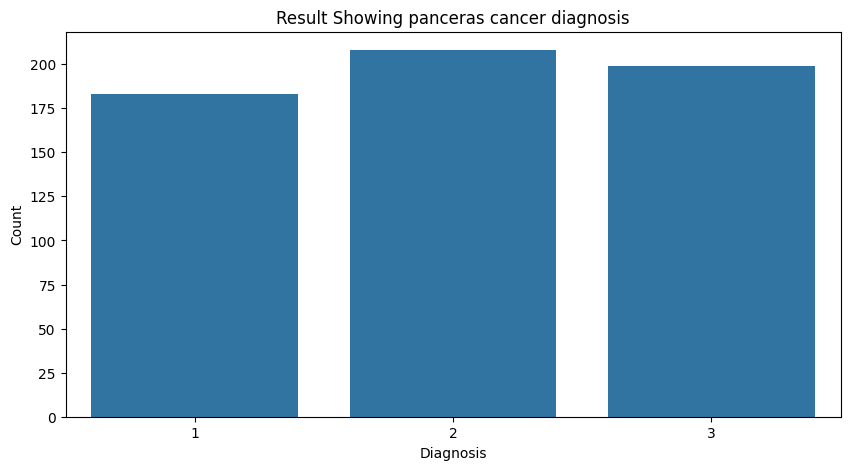

In [29]:

plt.figure(figsize=(10,5))
sns.countplot(x='diagnosis',data=df_cl)
plt.title('Result Showing panceras cancer diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [30]:
df.isnull().sum()

sample_id           0
patient_cohort      0
sample_origin       0
age                 0
sex                 0
diagnosis           0
plasma_CA19_9     240
creatinine          0
LYVE1               0
REG1B               0
TFF1                0
REG1A             284
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       590 non-null    object 
 1   patient_cohort  590 non-null    object 
 2   sample_origin   590 non-null    object 
 3   age             590 non-null    int64  
 4   sex             590 non-null    object 
 5   diagnosis       590 non-null    int64  
 6   plasma_CA19_9   590 non-null    float64
 7   creatinine      590 non-null    float64
 8   LYVE1           590 non-null    float64
 9   REG1B           590 non-null    float64
 10  TFF1            590 non-null    float64
 11  REG1A           590 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 55.4+ KB


In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['plasma_CA19_9', 'REG1A']] = imputer.fit_transform(df[['plasma_CA19_9', 'REG1A']])


In [35]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       590 non-null    object 
 1   patient_cohort  590 non-null    object 
 2   sample_origin   590 non-null    object 
 3   age             590 non-null    int64  
 4   sex             590 non-null    object 
 5   diagnosis       590 non-null    int64  
 6   plasma_CA19_9   590 non-null    float64
 7   creatinine      590 non-null    float64
 8   LYVE1           590 non-null    float64
 9   REG1B           590 non-null    float64
 10  TFF1            590 non-null    float64
 11  REG1A           590 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 55.4+ KB


In [36]:
df_cl=pd.get_dummies(df_cl,columns=['patient_cohort','sample_origin','sex'],drop_first=True)

In [39]:
df_cl.head()

,sample_id,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_Cohort2,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,sex_M
0,S1,33,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.0000,0,0,0,0,0
1,S10,81,1,569.3,0.97266,2.037585,94.46703,209.488250,228.4070,0,0,0,0,0
2,S100,51,1,7.0,0.78039,0.145589,102.36600,461.141000,229.7552,1,0,0,0,1
3,S101,61,1,8.0,0.70122,0.002805,60.57900,142.950000,906.0506,1,0,0,0,1
4,S102,62,1,9.0,0.21489,0.000860,65.54000,41.088000,233.5126,1,0,0,0,1


In [38]:
df_cl=df_cl.replace({True: 1, False: 0})

C:\Users\admin\AppData\Local\Temp\ipykernel_20260\1051382954.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cl=df_cl.replace({True: 1, False: 0})


In [40]:
df_cl=df_cl.drop('sample_id',axis=1)

In [41]:
print(df_cl['diagnosis'].value_counts())

diagnosis
2    208
3    199
1    183
Name: count, dtype: int64


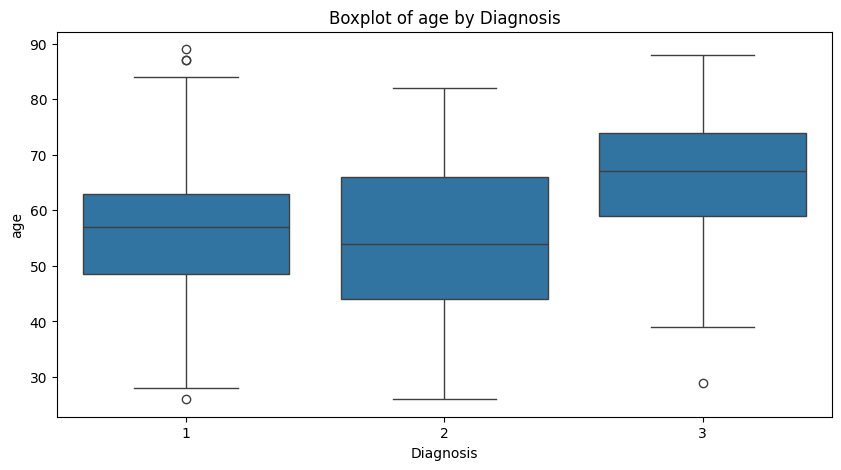

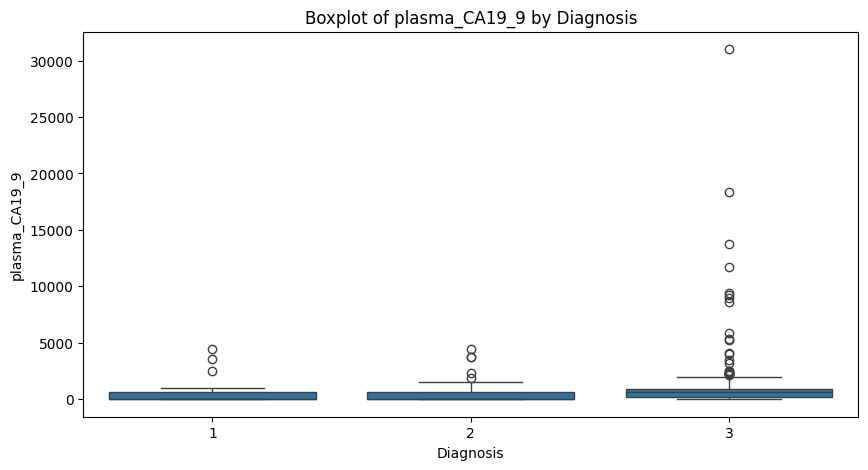

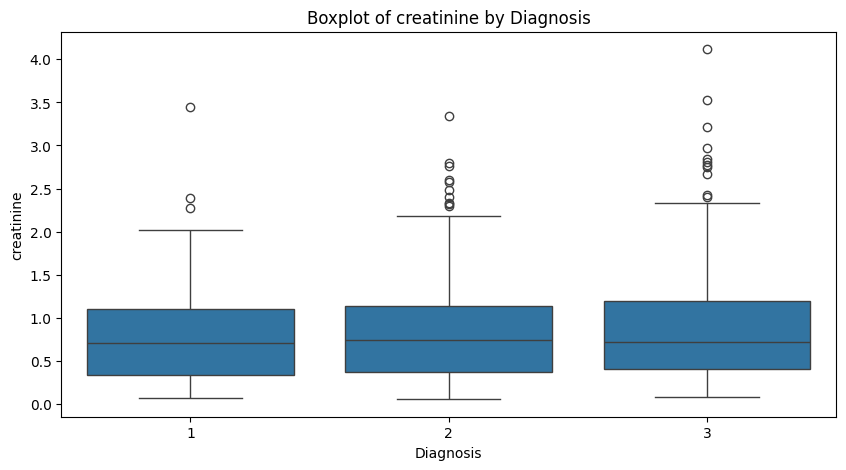

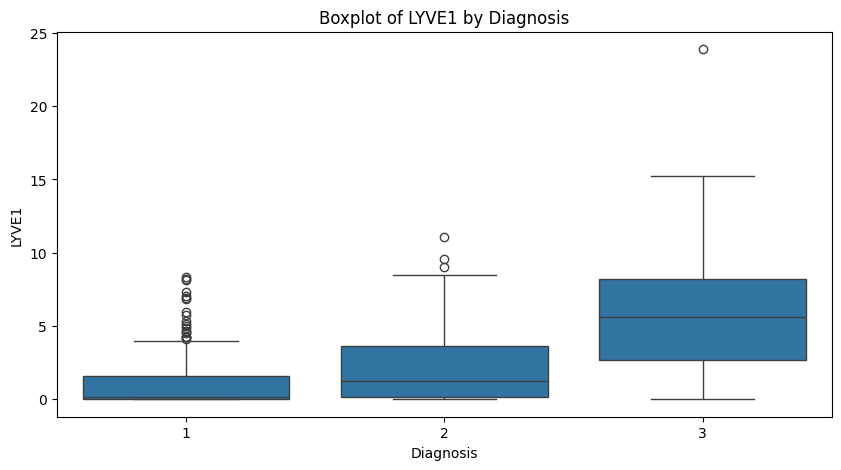

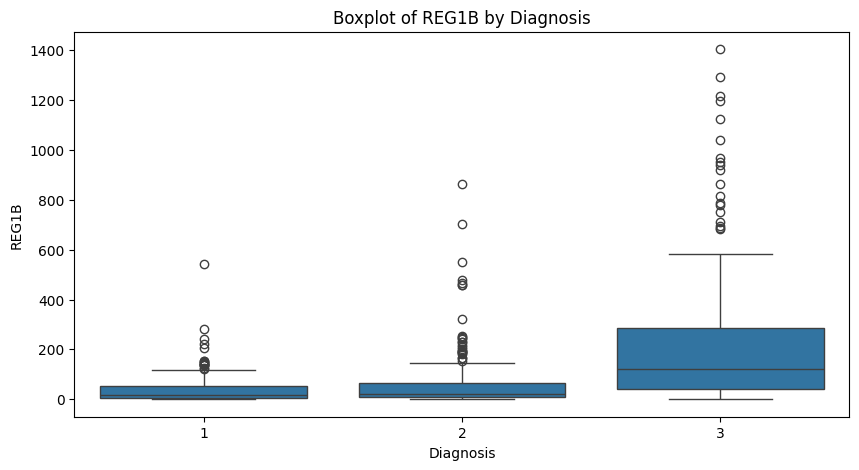

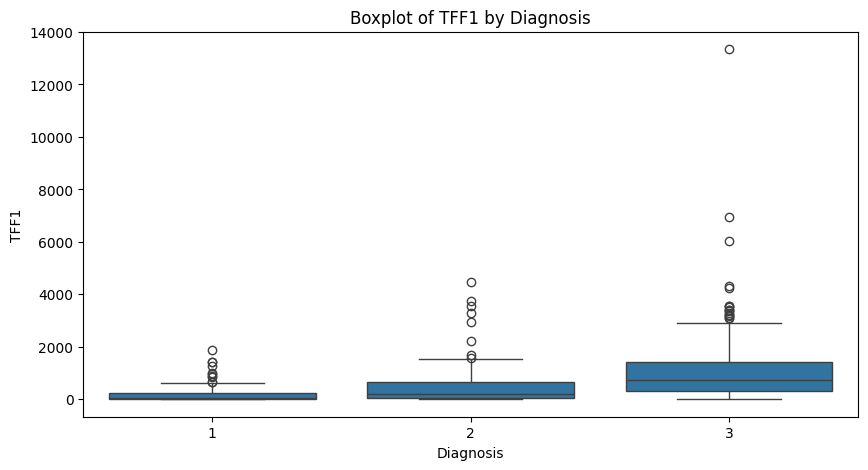

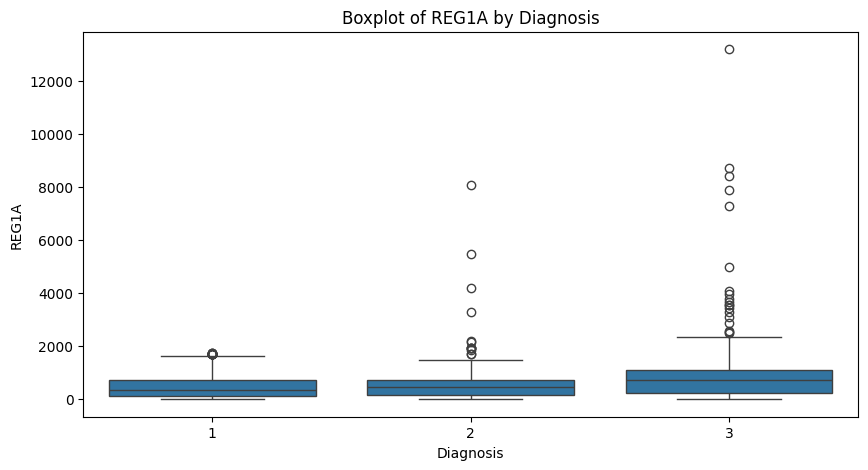

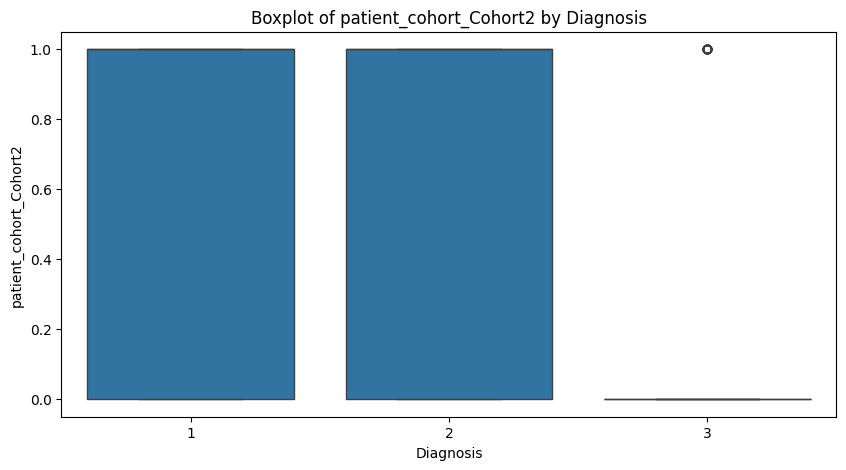

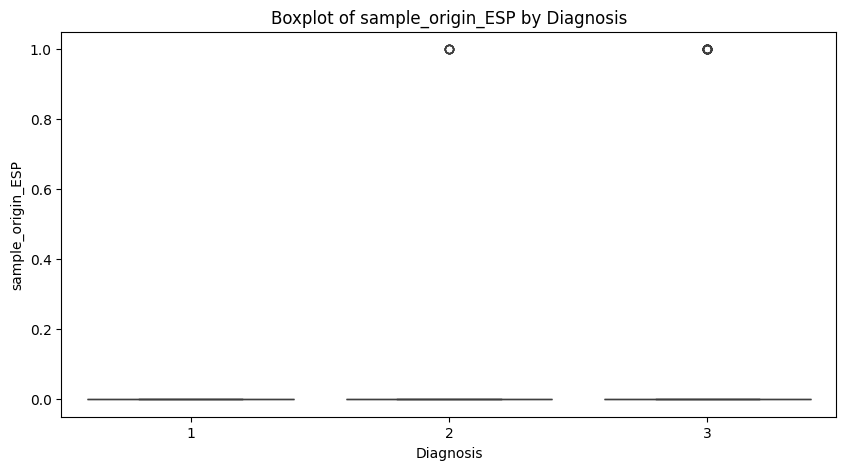

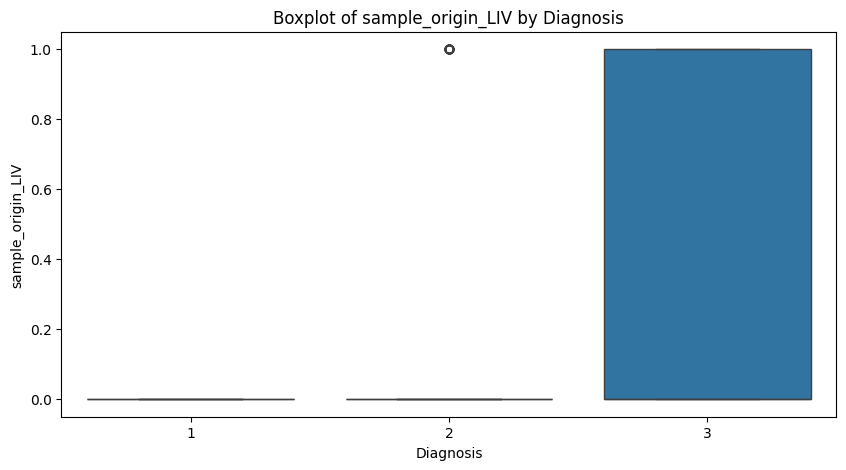

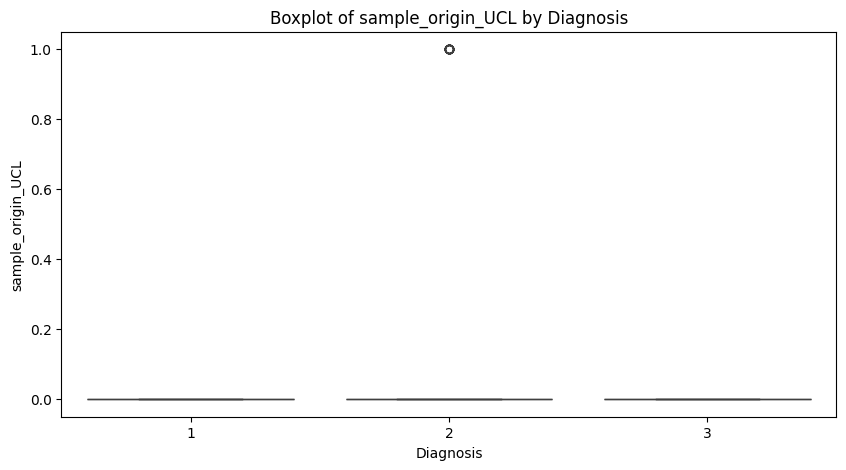

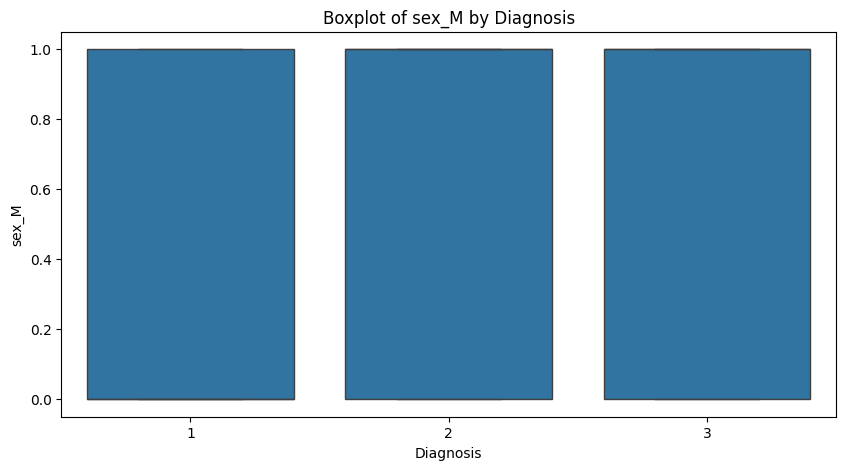

In [42]:
col=df_cl.drop('diagnosis',axis=1)
for i in col:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='diagnosis',y=i,data=df_cl)
    plt.title(f'Boxplot of {i} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(i)
    plt.show()

In [43]:
num_cols = ["plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
#remove outlier using log transformation
df_cl[num_cols] = np.log1p(df_cl[num_cols])


In [44]:
df_cl.head()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_Cohort2,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,sex_M
0,33,1,2.541602,1.041061,0.638279,3.988036,6.485066,7.141245,0,0,0,0,0
1,81,1,6.346163,0.679383,1.111063,4.558781,5.349430,5.435498,0,0,0,0,0
2,51,1,2.079442,0.576832,0.135919,4.638276,6.135870,5.441357,1,0,0,0,1
3,61,1,2.197225,0.531346,0.002801,4.120321,4.969466,6.810198,1,0,0,0,1
4,62,1,2.302585,0.194654,0.000859,4.197803,3.739763,5.457509,1,0,0,0,1


In [45]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cl[column] = df_cl[column].clip(lower, upper)
    return df

df_cl = cap_outliers_iqr(df_cl, 'age')
df_cl = cap_outliers_iqr(df_cl, 'plasma_CA19_9')
df_cl = cap_outliers_iqr(df_cl, 'creatinine')
df_cl = cap_outliers_iqr(df_cl, 'LYVE1')
df_cl = cap_outliers_iqr(df_cl, 'REG1B')
df_cl = cap_outliers_iqr(df_cl, 'TFF1')
df_cl = cap_outliers_iqr(df_cl, 'REG1A')

#plasma_CA19_9	creatinine	LYVE1	REG1B	TFF1	REG1A

In [46]:
cols_outliers = ['plasma_CA19_9','TFF1']  # replace with your column names

for col in cols_outliers:
    Q1 = df_cl[col].quantile(0.25)
    Q3 = df_cl[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3*IQR  # stronger cap
    upper = Q3 + 3*IQR
    df_cl[col] = df_cl[col].clip(lower, upper)


In [47]:
df_cl['diagnosis'].value_counts()

diagnosis
2    208
3    199
1    183
Name: count, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split   
x = df_cl.drop('diagnosis', axis=1)
y = df_cl['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

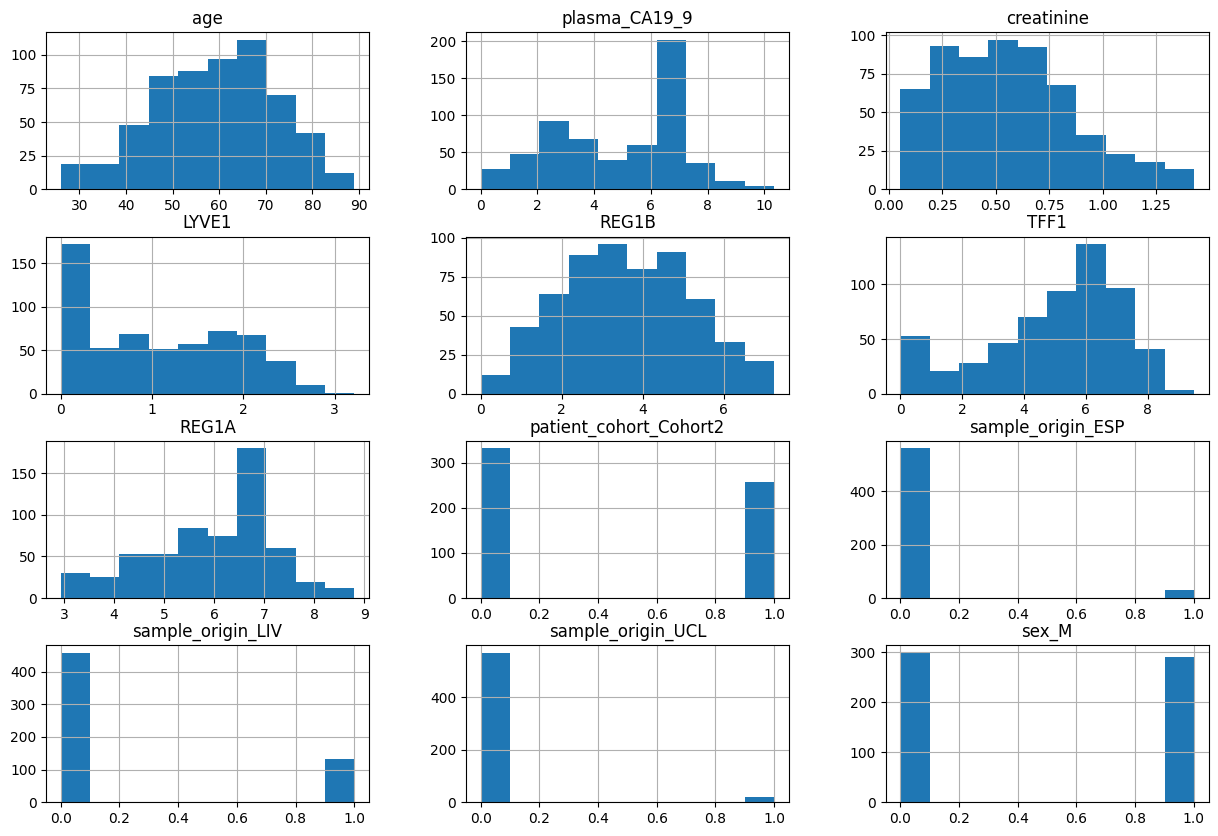

In [49]:
x.hist(figsize=(15,10))
plt.show()

In [50]:
df_reg=df_cl.copy()
from sklearn.model_selection import train_test_split   
x = df_reg.drop('diagnosis', axis=1)
y = df_reg['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. Scale your features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Learn scaling params from training set
x_test_scaled = scaler.transform(x_test)        # Apply same scaling to test set

# 2. Train logistic regression model
lr_model=LogisticRegression(C=1.0, solver='lbfgs', multi_class='multinomial', max_iter=2000)
#lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)

# 3. Make predictions
y_lr_pred = lr_model.predict(x_test_scaled)

# 4. Evaluate performance
print('Accuracy score of logistic regression:', accuracy_score(y_test, y_lr_pred))
print('\nConfusion matrix of logistic regression:')
print(confusion_matrix(y_test, y_lr_pred))
print('\nClassification report of logistic regression:\n', classification_report(y_test, y_lr_pred))


Accuracy score of logistic regression: 0.7457627118644068

Confusion matrix of logistic regression:
[[30  2  5]
 [12 23  6]
 [ 3  2 35]]

Classification report of logistic regression:
               precision    recall  f1-score   support

           1       0.67      0.81      0.73        37
           2       0.85      0.56      0.68        41
           3       0.76      0.88      0.81        40

    accuracy                           0.75       118
   macro avg       0.76      0.75      0.74       118
weighted avg       0.76      0.75      0.74       118



C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [55]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import numpy as np

# Shift labels
y_train_shifted = y_train - 1
y_test_shifted = y_test - 1

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train_shifted)  # use training data

y_xgboost_pred = xgboost_model.predict(x_test)
y_xgboost_pred_corrected = y_xgboost_pred + 1   # shift back to original labels

# Evaluation
print('Accuracy score of XGBoost:', accuracy_score(y_test, y_xgboost_pred_corrected))
print('Confusion matrix of XGBoost:\n', confusion_matrix(y_test, y_xgboost_pred_corrected))
print('Classification report of XGBoost:\n', classification_report(y_test, y_xgboost_pred_corrected))


Accuracy score of XGBoost: 0.7627118644067796
Confusion matrix of XGBoost:
 [[29  4  4]
 [10 25  6]
 [ 0  4 36]]
Classification report of XGBoost:
               precision    recall  f1-score   support

           1       0.74      0.78      0.76        37
           2       0.76      0.61      0.68        41
           3       0.78      0.90      0.84        40

    accuracy                           0.76       118
   macro avg       0.76      0.76      0.76       118
weighted avg       0.76      0.76      0.76       118



In [58]:
df_cl.tail()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_Cohort2,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,sex_M
585,68,3,6.48464,0.418881,2.086691,5.057780,6.265640,6.601612,1,0,0,0,1
586,71,3,6.48464,0.620340,2.234435,2.885638,5.509174,6.601612,1,0,0,0,0
587,63,3,6.48464,0.862261,2.160412,5.672295,6.288390,6.601612,1,0,0,0,1
588,75,3,6.48464,0.847832,2.219940,5.332381,6.584132,6.601612,1,0,0,0,0
589,74,3,7.30586,0.917981,2.219308,6.023298,7.612001,8.800176,0,0,0,0,1


In [68]:
import numpy as np
import pandas as pd

# Numeric columns to transform and cap
num_cols = ["plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
cols_strong_cap = ['plasma_CA19_9','TFF1']

# Precomputed Q1, Q3, IQR from training data
iqr_stats = {}
for col in num_cols + ['age']:
    Q1 = df_cl[col].quantile(0.25)
    Q3 = df_cl[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_stats[col] = (Q1, Q3, IQR)

def preprocess_single_input(new_input):
    df = pd.DataFrame([new_input])
    
    # Log transform numeric columns
    for col in num_cols:
        df[col] = np.log1p(df[col])
    
    # Normal IQR cap
    for col in num_cols + ['age']:
        Q1, Q3, IQR = iqr_stats[col]
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    
    # Strong cap
    for col in cols_strong_cap:
        Q1, Q3, IQR = iqr_stats[col]
        lower = Q1 - 3 * IQR
        upper = Q3 + 3 * IQR
        df[col] = df[col].clip(lower, upper)
    
    return df

# Example single input
new_input = {
    "age": 68,
    "plasma_CA19_9": 6.4846,
    "creatinine": 0.418881,
    "LYVE1": 2.086691,
    "REG1B": 5.057780,
    "TFF1": 6.265640,
    "REG1A": 6.601612,
    "patient_cohort_Cohort2": 1,
    "sample_origin_ESP": 0,
    "sample_origin_LIV": 0,
    "sample_origin_UCL": 0,
    "sex_M": 1
}

# Preprocess input  68	3	6.48464	0.418881	2.086691	5.057780	6.265640	6.601612	1	0	0	0	1
preprocessed_input = preprocess_single_input(new_input)

# Predict with your already trained XGBoost model
pred_shifted = xgboost_model.predict(preprocessed_input)  # model should already be trained
pred_original = pred_shifted + 1  # shift back if labels were originally 1,2,3

print("Predicted class:", pred_original[0])


Predicted class: 3


In [61]:
import pickle

pickle.dump(xgboost_model, open('xgboost_model.pkl', 'wb'))

In [62]:
model1=pickle.load(open('xgboost_model.pkl','rb'))

In [69]:
import numpy as np
import pandas as pd

# Numeric columns to transform and cap
num_cols = ["plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
cols_strong_cap = ['plasma_CA19_9','TFF1']

# Precomputed Q1, Q3, IQR from training data
iqr_stats = {}
for col in num_cols + ['age']:
    Q1 = df_cl[col].quantile(0.25)
    Q3 = df_cl[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_stats[col] = (Q1, Q3, IQR)

def preprocess_single_input(new_input):
    df = pd.DataFrame([new_input])
    
    # Log transform numeric columns
    for col in num_cols:
        df[col] = np.log1p(df[col])
    
    # Normal IQR cap
    for col in num_cols + ['age']:
        Q1, Q3, IQR = iqr_stats[col]
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    
    # Strong cap
    for col in cols_strong_cap:
        Q1, Q3, IQR = iqr_stats[col]
        lower = Q1 - 3 * IQR
        upper = Q3 + 3 * IQR
        df[col] = df[col].clip(lower, upper)
    
    return df

def predict_single_input(model, new_input):
    """
    Preprocess a single input dict and predict with the trained model.
    Returns the original class label (if shifted during training).
    """
    preprocessed_input = preprocess_single_input(new_input)
    pred_shifted = model.predict(preprocessed_input)
    pred_original = pred_shifted + 1  # shift back if labels were 1,2,3 originally
    return pred_original[0]

# Example input
new_input = {
    "age": 68,
    "plasma_CA19_9": 6.4846,
    "creatinine": 0.418881,
    "LYVE1": 2.086691,
    "REG1B": 5.057780,
    "TFF1": 6.265640,
    "REG1A": 6.601612,
    "patient_cohort_Cohort2": 1,
    "sample_origin_ESP": 0,
    "sample_origin_LIV": 0,
    "sample_origin_UCL": 0,
    "sex_M": 1
}

# Predict
predicted_class = predict_single_input(model1, new_input)
print("Predicted class:", predicted_class)


Predicted class: 3


In [70]:
import numpy as np
import pandas as pd

# Numeric columns to transform and cap
num_cols = ["plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
cols_strong_cap = ['plasma_CA19_9','TFF1']

# Feature column order (same as training)
feature_cols = [
    "age", "plasma_CA19_9", "creatinine", "LYVE1", "REG1B",
    "TFF1", "REG1A", "patient_cohort_Cohort2",
    "sample_origin_ESP", "sample_origin_LIV",
    "sample_origin_UCL", "sex_M"
]

# Precomputed Q1, Q3, IQR from training data
iqr_stats = {}
for col in num_cols + ['age']:
    Q1 = df_cl[col].quantile(0.25)
    Q3 = df_cl[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_stats[col] = (Q1, Q3, IQR)

def preprocess_single_input_list(input_list):
    """
    Takes a list of feature values in the correct order,
    returns a preprocessed DataFrame ready for prediction.
    """
    df = pd.DataFrame([input_list], columns=feature_cols)
    
    # Log transform numeric columns
    for col in num_cols:
        df[col] = np.log1p(df[col])
    
    # Normal IQR cap
    for col in num_cols + ['age']:
        Q1, Q3, IQR = iqr_stats[col]
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    
    # Strong cap
    for col in cols_strong_cap:
        Q1, Q3, IQR = iqr_stats[col]
        lower = Q1 - 3 * IQR
        upper = Q3 + 3 * IQR
        df[col] = df[col].clip(lower, upper)
    
    return df

def predict_single_input_list(model, input_list):
    """
    Preprocesses a list input and predicts the class with label shift.
    """
    preprocessed_input = preprocess_single_input_list(input_list)
    pred_shifted = model.predict(preprocessed_input)
    pred_original = pred_shifted + 1  # shift back if labels were 1,2,3 originally
    return pred_original[0]

# Example input as list (same order as feature_cols)
new_input_list = [
    68,        # age
    6.4846,    # plasma_CA19_9
    0.418881,  # creatinine
    2.086691,  # LYVE1
    5.057780,  # REG1B
    6.265640,  # TFF1
    6.601612,  # REG1A
    1,         # patient_cohort_Cohort2
    0, 0, 0,   # sample_origin_ESP, LIV, UCL
    1          # sex_M
]

# Predict
predicted_class = predict_single_input_list(model1, new_input_list)
print("Predicted class:", predicted_class)


Predicted class: 3
